In [21]:
#Implement Decision Tree learning
import numpy as np

class DecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        total_samples = len(y)

        for c in classes:
            p = np.sum(y == c) / total_samples
            entropy -= p * np.log2(p)

        return entropy

    def _information_gain(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        left_y = y[left_mask]
        right_y = y[right_mask]

        if len(left_y) == 0 or len(right_y) == 0:
            return 0

        left_entropy = self._entropy(left_y)
        right_entropy = self._entropy(right_y)

        p_left = len(left_y) / len(y)
        p_right = len(right_y) / len(y)

        gain = self._entropy(y) - (p_left * left_entropy + p_right * right_entropy)
        return gain

    def _best_split(self, X, y):
        best_gain = 0
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])

            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def _grow_tree(self, X, y):
        if len(np.unique(y)) == 1:
            return {'class': y[0]}

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return {'class': np.argmax(np.bincount(y))}

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self._grow_tree(X[left_mask], y[left_mask])
        right_subtree = self._grow_tree(X[right_mask], y[right_mask])

        return {
            'feature_idx': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _predict_sample(self, sample, tree):
        if 'class' in tree:
            return tree['class']
        else:
            feature_idx = tree['feature_idx']
            threshold = tree['threshold']

            if sample[feature_idx] <= threshold:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])

    def predict(self, X):
        predictions = []
        for sample in X:
            prediction = self._predict_sample(sample, self.tree)
            predictions.append(prediction)
        return np.array(predictions)



In [22]:
# Sample dataset
X = np.array([
    [2.5, 3],
    [1, 7],
    [5, 1],
    [7, 4],
    [3.5, 0.5],
    [8, 8],
    [6, 4.5],
    [4, 4]
])

y = np.array([0, 1, 0, 1, 0, 1, 1, 0])

# Creating an instance of DecisionTree
tree_classifier = DecisionTree()

# Training the tree
tree_classifier.fit(X, y)

# Test data
X_test = np.array([[3, 2], [5, 5]])

# Making predictions
predictions = tree_classifier.predict(X_test)
print("Predictions:", predictions)


Predictions: [0 0]


In [7]:
#Logistic Regression

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, h, y):
        m = len(y)
        epsilon = 1e-5  # small constant to prevent log(0)
        return (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            # Compute predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(z)

            # Compute gradients
            error = predictions - y
            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and print cost every 100 iterations
            if i % 100 == 0:
                cost = self._compute_cost(predictions, y)
                print(f"Iteration {i}: Cost={cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in predictions]

logistic_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

logistic_model.fit(X, y)

predictions = logistic_model.predict(X_test)


Iteration 0: Cost=0.6931271807599427
Iteration 100: Cost=0.5637517702063797
Iteration 200: Cost=0.5364863750316886
Iteration 300: Cost=0.5208064411421293
Iteration 400: Cost=0.5085640275099852
Iteration 500: Cost=0.49772629988199657
Iteration 600: Cost=0.48765854222778604
Iteration 700: Cost=0.478132017624457
Iteration 800: Cost=0.4690521105253077
Iteration 900: Cost=0.4603718922578087


In [11]:
#Multilayer Perceptron

import numpy as np

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, num_iterations=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        
        self.weights_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _forward_propagation(self, X):
        # Forward pass through the network
        hidden_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_output = self._sigmoid(hidden_input)

        output_layer_input = np.dot(hidden_output, self.weights_output) + self.bias_output
        output = self._softmax(output_layer_input)

        return hidden_output, output

    def _backward_propagation(self, X, y, hidden_output, output):
        m = len(y)
        y_encoded = np.zeros_like(output)
        y_encoded[np.arange(m), y] = 1  # One-hot encode the labels
    
        output_error = output - y_encoded
        d_weights_output = np.dot(hidden_output.T, output_error) / m
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / m
        
        hidden_error = np.dot(output_error, self.weights_output.T) * (hidden_output * (1 - hidden_output))
        d_weights_hidden = np.dot(X.T, hidden_error) / m
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.weights_output -= self.learning_rate * d_weights_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_hidden -= self.learning_rate * d_weights_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def fit(self, X, y):
        for i in range(self.num_iterations):
            hidden_output, output = self._forward_propagation(X)
            self._backward_propagation(X, y, hidden_output, output)

    def predict(self, X):
        _, output = self._forward_propagation(X)
        return np.argmax(output, axis=1)

# Generating sample data function
def generate_sample_data(input_size, output_size, num_samples):
    X = np.random.randn(num_samples, input_size)
    y = np.random.randint(0, output_size, size=num_samples)
    return X, y


input_size = 10  
hidden_size = 20  
output_size = 3  

# Generate sample data
num_samples = 1000  
X_sample, y_sample = generate_sample_data(input_size, output_size, num_samples)

# Initialize Multilayer Perceptron
mlp = MultilayerPerceptron(input_size, hidden_size, output_size, learning_rate=0.1, num_iterations=1000)

# Train the MLP on sample data
mlp.fit(X_sample, y_sample)

# Make predictions using the trained model
predictions = mlp.predict(X_sample[:10])  
print("Predictions:", predictions)



Predictions: [0 2 2 1 2 0 1 0 1 0]


In [12]:
#SVM

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a sample dataset 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Makeing predictions on the test set
predictions = svm_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of SVM Classifier: {accuracy:.2f}")


Accuracy of SVM Classifier: 1.00


In [14]:
#adaboost

import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples = len(X)
        weights = np.full(n_samples, (1 / n_samples))

        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=1)  
            tree.fit(X, y, sample_weight=weights)

            predictions = tree.predict(X)

            error = np.sum(weights * (predictions != y))
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            self.models.append(tree)
            self.alphas.append(alpha)

    def predict(self, X):
        n_samples = len(X)
        predictions = np.zeros(n_samples)

        for alpha, tree in zip(self.alphas, self.models):
            predictions += alpha * tree.predict(X)

        return np.sign(predictions)

ada_boost = AdaBoost(n_estimators=50)  


ada_boost.fit(X_train, y_train)


predictions = ada_boost.predict(X_test)
print("Predictions:", predictions)


Predictions: [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0.]


In [15]:
#Bagging using Random Forests

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest.fit(X_train, y_train)


predictions = random_forest.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")


Accuracy of Random Forest Classifier: 1.00


C:\Users\avi11\AppData\Local\Temp\ipykernel_17412\4053449842.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


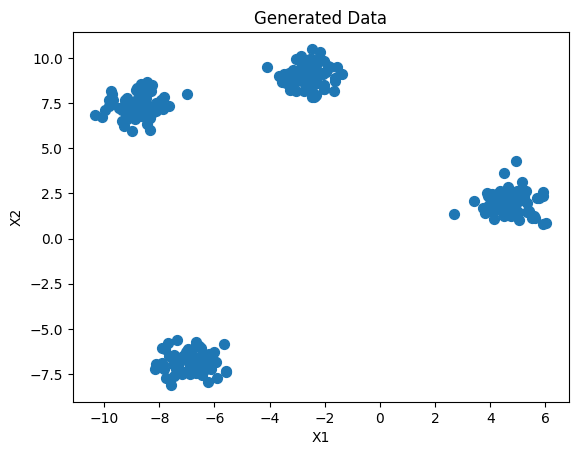

D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


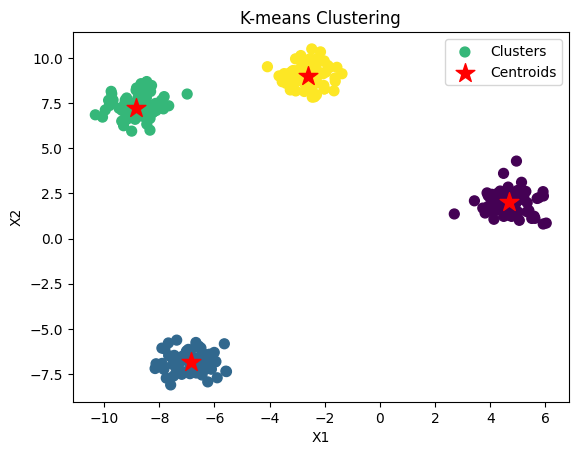

In [16]:
#K-Means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)


plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', label='Clusters')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


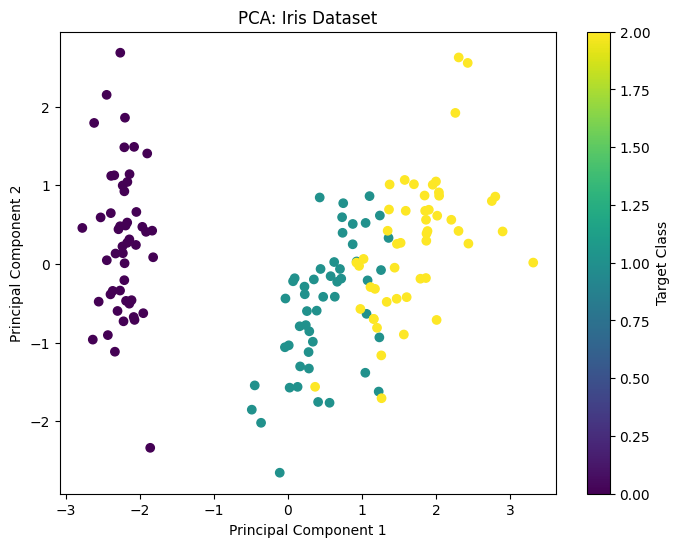

In [18]:
#PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA: Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()


In [19]:
#Imbalanced

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Generating a balanced dataset
X_balanced, y_balanced = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.5, 0.5], random_state=42)


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)


model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)


predictions_balanced = model_balanced.predict(X_test_balanced)


accuracy_balanced = accuracy_score(y_test_balanced, predictions_balanced)
classification_report_balanced = classification_report(y_test_balanced, predictions_balanced)

print(f"Accuracy on Balanced Dataset: {accuracy_balanced:.2f}")
print("Classification Report on Balanced Dataset:")
print(classification_report_balanced)


Accuracy on Balanced Dataset: 0.83
Classification Report on Balanced Dataset:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [20]:
#Balanced

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Generating a balanced dataset
X_balanced, y_balanced = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.5, 0.5], random_state=42)


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)


model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)


predictions_balanced = model_balanced.predict(X_test_balanced)


accuracy_balanced = accuracy_score(y_test_balanced, predictions_balanced)
classification_report_balanced = classification_report(y_test_balanced, predictions_balanced)

print(f"Accuracy on Balanced Dataset: {accuracy_balanced:.2f}")
print("Classification Report on Balanced Dataset:")
print(classification_report_balanced)


Accuracy on Balanced Dataset: 0.83
Classification Report on Balanced Dataset:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

